In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import json
import traceback
import os

In [2]:
# DEBUG=True
DEBUG=False
batch_size=64
shuffle_flag=False if DEBUG else True
random_seed=1
if DEBUG:
    torch.manual_seed(random_seed)

train_data=torchvision.datasets.MNIST("./data",train=True,download=True,transform=torchvision.transforms.ToTensor())
test_data=torchvision.datasets.MNIST("./data",train=False,download=True,transform=torchvision.transforms.ToTensor())# Warning: ToTensor will divide the original data by 255
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=shuffle_flag,) 
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=shuffle_flag)

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


81.5%

102.8%
0.1%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



112.7%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Text(0.5, 1.0, 'digit 5')

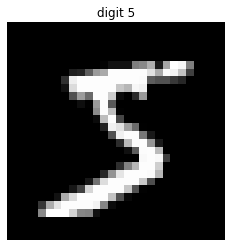

In [3]:
plt.imshow(train_data.data[0].detach().numpy(),cmap="gray")
plt.axis("off")
plt.title("digit {}".format(train_data.targets[0].detach().numpy()))

In [4]:
from ConvNetwork import ConvNet
from Trainer import train

In [5]:
input_size_2d=np.array(train_data.data[0].shape)
model=ConvNet(input_size_2d,10)

In [6]:
# Define hyperparamters, optimizers and loss_function
EPOCHES=20
lr=0.01
momentum=0.5
optimizer=optim.SGD(model.parameters(),lr=lr,momentum=momentum)
loss_func=nn.CrossEntropyLoss() # Combined LogSoftmax() and NLL_Loss()

In [7]:
save_path="./result"
if not os.path.exists(save_path):
    os.mkdir(save_path)
recorded_message=train(model,train_loader,test_loader,optimizer,loss_func,EPOCHES,PATH="result",checkpoint_interval=int(EPOCHES/5))

Train Epoch:1/20 	 Average Loss: 2.202128ss: 1.658236


In [8]:
def draw_loss(ax,epoch,loss,label):
    ax.plot(epoch,loss,label=label)
    ax.set_title("loss")
    return ax

def draw_lr(ax,epoch,learning_rate,label):
    ax.plot(epoch,learning_rate,label=label)
    ax.set_title("learning rate")
    return ax

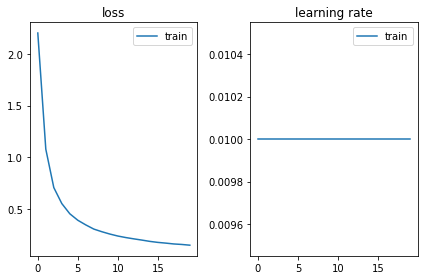

In [9]:
fig=plt.figure()
axes=fig.subplots(1,2)
train_loss=np.array(recorded_message["loss"]["train_loss"])
learning_rate=np.array(recorded_message["lr"])
draw_loss(axes[0],train_loss[:,0],train_loss[:,1],"train")
draw_lr(axes[1],learning_rate[:,0],learning_rate[:,1],"train")
for ax in axes:
    ax.legend()
fig.tight_layout()

In [30]:
with open(os.path.join(save_path,"training_msg.json"),"w") as fout:
    json.dump(recorded_message,fout)

In [35]:
def preprocess(data):
    return data.reshape(-1,1,28,28)/255

In [73]:
feature_query=model.feature_extraction(preprocess(test_data.data[0])).detach()

In [74]:
feature_gallery=model.feature_extraction(preprocess(train_data.data)).detach()

In [76]:
np.savetxt("feature_gallery.csv",feature_gallery,delimiter=",")

## Visualizaton of feature_gallery

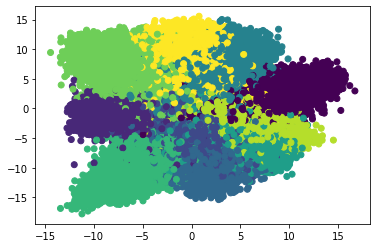

In [41]:
plt.scatter(feature_gallery[:,0].detach().numpy(),feature_gallery[:,1].detach().numpy(),c=train_data.targets)

In [44]:
import pandas as pd

In [47]:
feature_gallery_df=pd.concat([pd.DataFrame(feature_gallery.detach().numpy(),columns=["x","y"]),
pd.DataFrame(train_data.targets.numpy(),columns=['label'])],axis=1,join="inner")

In [50]:
groups=feature_gallery_df.groupby("label")

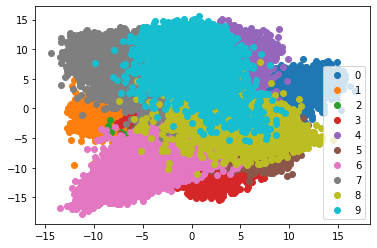

In [67]:
for key,data in groups:
    plt.scatter(data["x"],data["y"],label=key)
plt.legend()

## Determine the top 20 in gallery

In [72]:
torch. feature_query@feature_gallery.T

tensor([-145.1666,  -77.5492,   38.2180,  ..., -137.1736,  -11.4561,
         -41.8237], grad_fn=<SqueezeBackward3>)

In [71]:
feature_gallery.T

tensor([[  6.1192,   9.8542,  -2.1283,  ...,   7.5755,  -6.7587,   3.3128],
        [ -9.6921,   4.2462,   1.8113,  ...,  -6.5921, -11.1279,  -0.5745]],
       grad_fn=<PermuteBackward0>)